## Description Clustering

In [1]:
pip install corextopic

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=6042a5825aab018cdf76b69c228c6dafb14889664069ecae49c81a763682dcd0
  Stored in directory: c:\users\sreed\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6f36f6cc9043db70789e5d8a91c319c8bced1eb9bff827369129460eecadce0a
  Stored in directory: c:\users\sreed\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.cluster import AffinityPropagation

import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models

In [4]:
df = pd.read_csv('tidy_df.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Sale_Total,cleaned_description
0,536365.0,85123A,6.0,2.55,17850.0,United Kingdom,15.30,hanging heart tlight holder
1,536365.0,71053.0,6.0,3.39,17850.0,United Kingdom,20.34,metal lantern
2,536365.0,84406B,8.0,2.75,17850.0,United Kingdom,22.00,cream cupid heart coat hanger
3,536365.0,84029G,6.0,3.39,17850.0,United Kingdom,20.34,knitted union flag hot water bottle
4,536365.0,84029E,6.0,3.39,17850.0,United Kingdom,20.34,woolly hottie heart


In [5]:
X = df['cleaned_description']
X.head()

0            hanging heart tlight holder
1                          metal lantern
2          cream cupid heart coat hanger
3    knitted union flag hot water bottle
4                    woolly hottie heart
Name: cleaned_description, dtype: object

In [8]:
len(X)

523695

I am going to create a count vectorizer. Many of my descriptions contain bigrams like "lunch box" so I am going to include uni and bigrams. I scanned the entire description list to identify stopwords so no need to set a max_df. I will set a conservative min_df to exclude any odd off descriptions I might have missed.

In [6]:
count_vectorizer = CountVectorizer(ngram_range = (1, 2), min_df = 5)

transformed_vector = count_vectorizer.fit_transform(X)
transformed_vector.shape

(523695, 6845)

In [26]:
lda_model = LatentDirichletAllocation(n_components = 2, max_iter=10)
lda = lda_model.fit_transform(transformed_vector)

In [29]:
%%timeit

lda_model.perplexity(transformed_vector)

56.2 s ± 2.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
feature_names = count_vectorizer.get_feature_names_out()
feature_names[0:10]

array(['abc', 'abc painted', 'abc treasure', 'abstract',
       'abstract circle', 'acapulco', 'acapulco mat', 'account',
       'account greeting', 'acrylic'], dtype=object)

In [12]:
from IPython.display import clear_output

In [11]:
import timeit

<strong>How Many Clusters?</strong>

For this problem I don't know in advance how many segments to break the business down into. My initial thought is to try to break it down into a few core segments(3-5) but I will try to explore some other options along the way.

### LDA with Scikit Learn

In [41]:
perplexities = []
for NUM_TOPICS in range(2,4):
    
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    
    print("Current progress:", np.round((NUM_TOPICS-1)/2 *100, 2),"%")

Current progress: 150.0 %


In [49]:
start = timeit.default_timer()
for NUM_TOPICS in range(4,6):
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-3)/2) )  / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-3)/2 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 50.0 %
Current run time: 26.72 minutes
Expected Run Time: 53.44 minutes


In [52]:
start = timeit.default_timer()
for NUM_TOPICS in range(6,9):
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-5)/3 ) ) / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-5)/3 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 100.0 %
Current run time: 36.69 minutes
Expected Run Time: 36.69 minutes


In [55]:
start = timeit.default_timer()
for NUM_TOPICS in range(9,12):
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-8)/3 ) ) / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-8)/3 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 100.0 %
Current run time: 36.04 minutes
Expected Run Time: 36.04 minutes


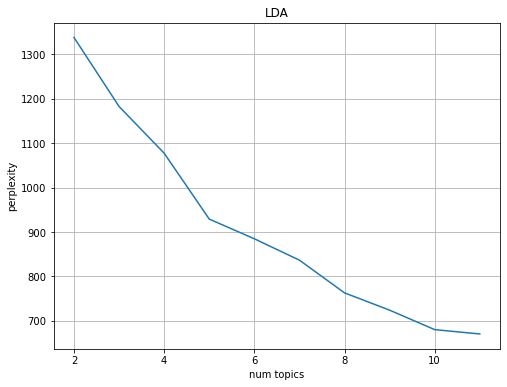

In [56]:
x = range(2, 12)
y = perplexities

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y)

ax.set(xlabel = 'num topics', ylabel = 'perplexity', title = 'LDA')
ax.grid()

plt.show()

It looks like we get the greatest 'elbow' shape at 5 topics. Perplexity is still quite high though.

In [21]:
start = timeit.default_timer()
perplexities = []
for NUM_TOPICS in range(12,15):
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-11)/3 ) ) / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-11)/3 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 100.0 %
Current run time: 64.51 minutes
Expected Run Time: 64.51 minutes


In [ ]:
start = timeit.default_timer()
for NUM_TOPICS in range(15,18):
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-14)/3 ) ) / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-14)/3 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 100.0 %
Current run time: 34.2 minutes
Expected Run Time: 34.2 minutes


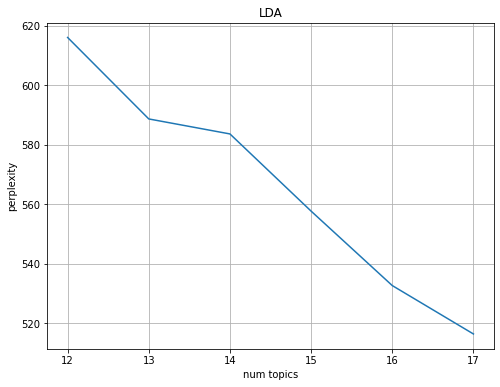

In [24]:
x = range(12, 18)
y = perplexities

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y)

ax.set(xlabel = 'num topics', ylabel = 'perplexity', title = 'LDA')
ax.grid()

plt.show()

In [57]:
start = timeit.default_timer()

scores = []
for NUM_TOPICS in range(2,12):
    lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    scores.append(lda_model.score(transformed_vector))
    
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-1)/10 ) ) / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-1)/10 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 10.0 %
Current run time: 15.02 minutes
Expected Run Time: 150.22 minutes
Current progress: 20.0 %
Current run time: 29.66 minutes
Expected Run Time: 148.3 minutes
Current progress: 30.0 %
Current run time: 44.76 minutes
Expected Run Time: 149.21 minutes
Current progress: 40.0 %
Current run time: 57.41 minutes
Expected Run Time: 143.53 minutes
Current progress: 50.0 %
Current run time: 69.16 minutes
Expected Run Time: 138.32 minutes
Current progress: 60.0 %
Current run time: 80.46 minutes
Expected Run Time: 134.11 minutes
Current progress: 70.0 %
Current run time: 91.87 minutes
Expected Run Time: 131.24 minutes
Current progress: 80.0 %
Current run time: 102.82 minutes
Expected Run Time: 128.53 minutes
Current progress: 90.0 %
Current run time: 113.89 minutes
Expected Run Time: 126.55 minutes
Current progress: 100.0 %
Current run time: 124.78 minutes
Expected Run Time: 124.78 minutes


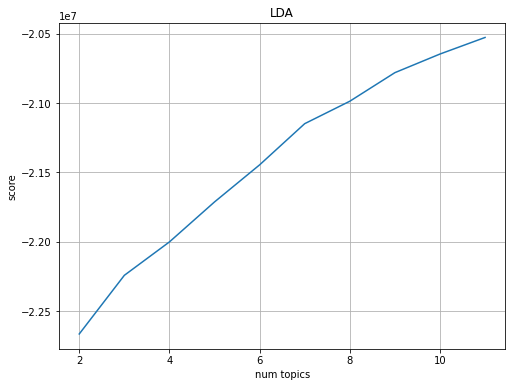

In [58]:
x = range(2, 12)
y = scores

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y)

ax.set(xlabel = 'num topics', ylabel = 'score', title = 'LDA')
ax.grid()

plt.show()

In [59]:
NUM_TOPICS = 5

lda_model = LatentDirichletAllocation(n_components = NUM_TOPICS, max_iter=10)

lda = lda_model.fit_transform(transformed_vector)
lda.shape

(523695, 5)

In [28]:
def print_topic(identifier, top_words=10):
    for topic_id, topic_word_probs in enumerate(lda_model.components_):
        if topic_id == identifier:
            print(f"Topic {topic_id}: ")
            
            top_feature_names = [feature_names[i] + "," for i in topic_word_probs.argsort()[: -top_words - 1: -1]]
            
            print(" ".join(top_feature_names))

In [93]:
for i in range(NUM_TOPICS):
    print_topic(i, top_words=10)

Topic 0: 
vintage, card, paper, metal, christmas, sign, clock, retrospot, birthday, bunting,
Topic 1: 
bag, design, lunch, lunch bag, box, retrospot, polkadot, spaceboy, suki, jam,
Topic 2: 
tin, home, cake, pantry, design, candle, tea, cover, pantry design, vintage,
Topic 3: 
heart, hanging, tlight, holder, decoration, christmas, tlight holder, hot, bottle, water,
Topic 4: 
cake, retrospot, case, bag, box, cake case, dolly, design, girl, dolly girl,


Descriptions containing the same words are being placed into multiple topics (e.g. 'christmas' is in topic 0 and 3, and 'box' is in 1 and 4). This might be okay. For example we meaningfully could group 'christmas card' and 'thanksgiving card' together, then group 'christmas decoration' and 'thanksgiving decoration'. That said, this could also be a sign that our groupings are just too loose make meaningful distinctions.

In [62]:
topics = []

for i in range(len(X)):
    topics.append(lda[i].argmax())

In [63]:
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
lda_2d_tsne = tsne.fit_transform(lda)
lda_df_tsne = pd.DataFrame(lda_2d_tsne)
lda_df_tsne.shape

C:\Users\SReed\.conda\envs\cluster\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SReed\.conda\envs\cluster\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(523695, 2)

In [65]:
df['topic'] = topics

df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Sale_Total,cleaned_description,topic
0,536365.0,85123A,6.0,2.55,17850.0,United Kingdom,15.30,hanging heart tlight holder,3
1,536365.0,71053.0,6.0,3.39,17850.0,United Kingdom,20.34,metal lantern,0
2,536365.0,84406B,8.0,2.75,17850.0,United Kingdom,22.00,cream cupid heart coat hanger,3
3,536365.0,84029G,6.0,3.39,17850.0,United Kingdom,20.34,knitted union flag hot water bottle,3
4,536365.0,84029E,6.0,3.39,17850.0,United Kingdom,20.34,woolly hottie heart,2


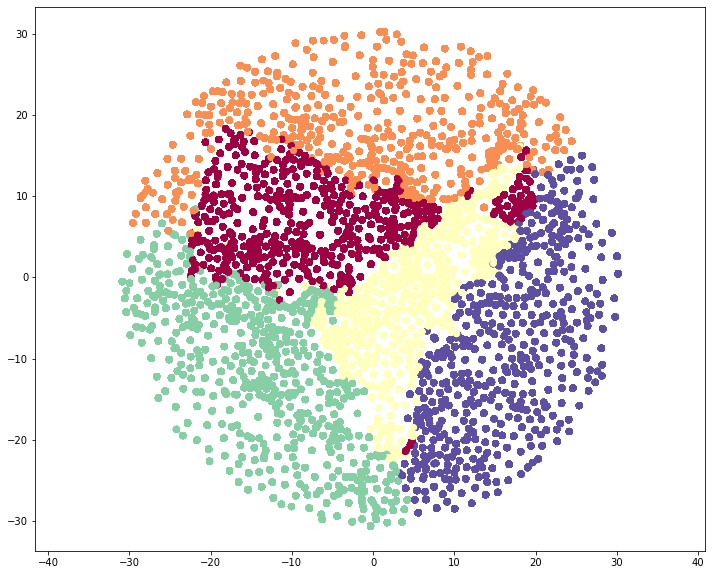

In [67]:
plt.subplots(figsize=(12, 10))
plt.axis('equal')

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c=df['topic'], cmap = plt.cm.Spectral)

With so many data points converging to the center it makes some sense why topics would be overlapping. It looks like the partitions aren't horrible but the left most section of the orange looks questionable and the disconnected red seem to clearly be misclassified.

In [37]:
from mpl_toolkits import mplot3d

## LDA with Gensim

In [55]:
all_descriptions = df['cleaned_description'].values.tolist()
all_tokens = [description.split(' ') for description in all_descriptions]

In [56]:
# Add bigrams to docs
bigram_phrases = Phrases(all_tokens)
bigram = Phraser(bigram_phrases)

for idx in range(len(all_tokens)):
    for token in bigram[all_tokens[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            all_tokens[idx].append(token)

In [57]:
bigram.phrasegrams

{'woolly_hottie': 18.90197083800673,
 'paris_fashion': 16.5761231884058,
 'inflatable_political': 75.58564288959563,
 'political_globe': 99.00654632017456,
 'polka_dot': 34.177383988902314,
 'save_planet': 13.288937930687592,
 'personal_doorsign': 30.47902589374926,
 'youre_confusing': 16.156235276555844,
 'willie_winkie': 13.59959947431003,
 'le_enfants': 21.27144866385373,
 'flying_duck': 12.416340257171116,
 'rain_hat': 10.740611180370777,
 'skipping_rope': 13.863849085733584,
 'embroidered_quilt': 10.34636636320581,
 'sew_crochet': 11.098825831702543,
 'rotator_battery': 69.81857985912812,
 'battery_operated': 69.85352059572062,
 'take_leave': 17.95940042529586,
 'im_holiday': 11.117040052665802,
 'snowflake_portable': 22.78854846810648,
 'football_celebration': 12.7001563071602,
 'bright_blue': 63.95927637246456,
 'invite_spaceman': 12.83248484848485,
 'transfer_tattoo': 41.745286673553714,
 'funny_face': 33.8924753808602,
 'swirly_marble': 10.253850713305564,
 'faceted_bangle': 1

In [58]:
dictionary = Dictionary(all_tokens)

In [59]:
# bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in all_tokens]

In [79]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2241
Number of documents: 523695


Less tokens than with sci-kit learn

In [60]:
def compute_coherence_values(corpus, dictionary, num_topics):
    """
    Returns coherence of LDA model based for a given number of topics
    
    Arguments:
        corpus: list, of bag-of-words representation of each document
        dictionary: gensim dictionary oboject of document tokens
        num_topics: int, number of topics to model
    Returns:
        coherence: Cv coherence measure of topic model
    """
    
    # Set training parameters
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None  
    
    # Make a index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       chunksize=chunksize,
                                       alpha='auto',
                                       eta='auto',
                                       iterations=iterations,
                                       num_topics=num_topics,
                                       passes=passes,
                                       eval_every=eval_every
                                      )
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=all_tokens, 
                                         dictionary=dictionary, 
                                         coherence='c_v')
    
    coherence = coherence_model_lda.get_coherence()  
    
    return coherence

In [81]:
start = timeit.default_timer()

coherence_scores = []
for NUM_TOPICS in range(2,12):
    coherence = compute_coherence_values(corpus, dictionary, NUM_TOPICS)
    coherence_scores.append(coherence)
        
    stop = timeit.default_timer()
    
    time_perc = timeit.default_timer()
    expected_time = np.round( ( (time_perc - start) / ((NUM_TOPICS-1)/10 ) ) / 60, 2)
    
    print("Current progress:", np.round((NUM_TOPICS-1)/10 *100, 2),"%")
    print("Current run time:", np.round((stop - start)/60,2), "minutes")
    print("Expected Run Time:", expected_time, "minutes")

Current progress: 10.0 %
Current run time: 13.98 minutes
Expected Run Time: 139.78 minutes
Current progress: 20.0 %
Current run time: 29.89 minutes
Expected Run Time: 149.43 minutes
Current progress: 30.0 %
Current run time: 46.4 minutes
Expected Run Time: 154.68 minutes
Current progress: 40.0 %
Current run time: 63.14 minutes
Expected Run Time: 157.84 minutes
Current progress: 50.0 %
Current run time: 79.98 minutes
Expected Run Time: 159.97 minutes
Current progress: 60.0 %
Current run time: 97.07 minutes
Expected Run Time: 161.78 minutes
Current progress: 70.0 %
Current run time: 113.38 minutes
Expected Run Time: 161.96 minutes
Current progress: 80.0 %
Current run time: 130.2 minutes
Expected Run Time: 162.75 minutes
Current progress: 90.0 %
Current run time: 147.45 minutes
Expected Run Time: 163.83 minutes
Current progress: 100.0 %
Current run time: 164.97 minutes
Expected Run Time: 164.97 minutes


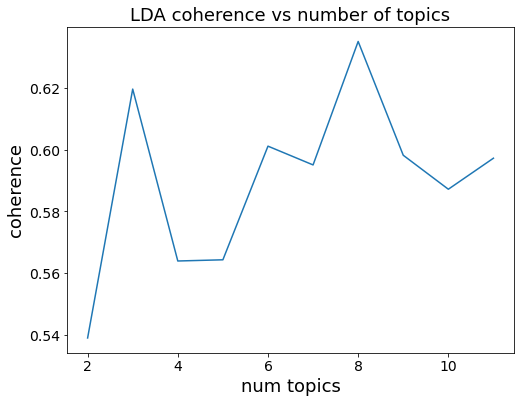

In [82]:
x = range(2, 12)
y = coherence_scores

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y)

plt.xlabel('num topics', fontsize=18)
plt.ylabel('coherence', fontsize=18)
plt.title('LDA coherence vs number of topics', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Gensim Model with 8 topics

In [94]:
# Set training parameters
num_topics = 8
chunksize = 2000
passes = 10
iterations = 200  

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

In [99]:
model.show_topics(num_words = 8)

[(0,
  '0.108*"heart" + 0.056*"decoration" + 0.053*"holder" + 0.050*"hanging" + 0.047*"tlight" + 0.046*"star" + 0.039*"mini" + 0.031*"glass"'),
 (1,
  '0.150*"christmas" + 0.117*"vintage" + 0.066*"cake" + 0.051*"tin" + 0.035*"doily" + 0.035*"case" + 0.032*"paisley" + 0.026*"bell"'),
 (2,
  '0.044*"pantry" + 0.042*"wall" + 0.039*"ivory" + 0.039*"paper" + 0.037*"clock" + 0.029*"chain" + 0.029*"kit" + 0.023*"alphabet"'),
 (3,
  '0.077*"metal" + 0.063*"card" + 0.060*"sign" + 0.043*"hand" + 0.040*"warmer" + 0.028*"vintage" + 0.024*"art" + 0.024*"dog"'),
 (4,
  '0.107*"retrospot" + 0.045*"tea" + 0.039*"wooden" + 0.039*"love" + 0.027*"antique" + 0.026*"frame" + 0.026*"traditional" + 0.025*"feltcraft"'),
 (5,
  '0.153*"bag" + 0.096*"box" + 0.082*"design" + 0.051*"lunch" + 0.042*"spaceboy" + 0.027*"candle" + 0.026*"polkadot" + 0.025*"childrens"'),
 (6,
  '0.059*"heart" + 0.046*"pencil" + 0.042*"wicker" + 0.036*"mug" + 0.030*"ceramic" + 0.027*"charlotte" + 0.026*"wooden" + 0.025*"drawer"'),
 (7,

In [11]:
#try a different set of parameters
num_topics = 8
chunksize = 10000
passes = 20
iterations = 500  

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model2 = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

In [12]:
model2.show_topics(num_words = 8)

[(0,
  '0.121*"bag" + 0.055*"lunch" + 0.051*"design" + 0.038*"spaceboy" + 0.032*"girl" + 0.032*"dolly" + 0.030*"retrospot" + 0.025*"childrens"'),
 (1,
  '0.137*"heart" + 0.062*"bottle" + 0.054*"hot" + 0.054*"holder" + 0.052*"water" + 0.051*"hanging" + 0.047*"tlight" + 0.036*"home"'),
 (2,
  '0.140*"vintage" + 0.080*"card" + 0.075*"metal" + 0.059*"sign" + 0.050*"bag" + 0.047*"doily" + 0.042*"paisley" + 0.025*"calm"'),
 (3,
  '0.049*"box" + 0.042*"tin" + 0.040*"pencil" + 0.040*"rose" + 0.032*"retrospot" + 0.029*"candle" + 0.027*"wrap" + 0.022*"baking"'),
 (4,
  '0.059*"tea" + 0.043*"hand" + 0.041*"polkadot" + 0.040*"warmer" + 0.033*"light" + 0.027*"love" + 0.027*"design" + 0.026*"union"'),
 (5,
  '0.079*"cake" + 0.045*"case" + 0.040*"mini" + 0.039*"vintage" + 0.035*"ribbon" + 0.034*"pantry" + 0.032*"christmas" + 0.032*"ceramic"'),
 (6,
  '0.060*"paper" + 0.048*"christmas" + 0.047*"retrospot" + 0.040*"wall" + 0.039*"bell" + 0.030*"kit" + 0.025*"chain" + 0.019*"babushka"'),
 (7,
  '0.098*"

In [66]:
import pyLDAvis.gensim_models as gensimvis

In [104]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(model, corpus, dictionary)
vis

C:\Users\SReed\.conda\envs\cluster\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.114090  0.126630       1        1  15.904233
1      0.302440 -0.095540       2        1  15.164723
0     -0.267882 -0.158126       3        1  14.752156
4     -0.123268  0.124730       4        1  13.429964
3      0.211367 -0.219130       5        1  10.652016
2     -0.028998  0.169987       6        1  10.142138
6     -0.200125 -0.203130       7        1   9.987908
7     -0.007626  0.254580       8        1   9.966861, topic_info=          Term          Freq         Total Category  logprob  loglift
93         bag  45623.000000  45623.000000  Default  30.0000  30.0000
107  christmas  42616.000000  42616.000000  Default  29.0000  29.0000
1        heart  41137.000000  41137.000000  Default  28.0000  28.0000
46     vintage  38961.000000  38961.000000  Default  27.0000  27.0000
82   retrospot  26925.000000  26925.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
227  chocolate   3431.266167   4236.733819   Topic8  -3.9983   2.0950
30      colour   4696.858813   6383.872377   Topic8  -3.6844   1.9990
53     doormat   3589.280569   5097.168139   Topic8  -3.9533   1.9552
281       rose   4662.944089   9023.403035   Topic8  -3.6916   1.6457
108        kit   2149.817701  11041.924347   Topic8  -4.4659   0.6696

[323 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
167       5  0.999554   airline
65        6  0.999871     alarm
47        6  0.999741  alphabet
454       3  0.999699     angel
539       2  0.999338    animal
...     ...       ...       ...
447       1  0.349073      wrap
447       2  0.650920      wrap
527       7  0.999678    wreath
63        6  0.999433    yellow
205       2  0.999884      zinc

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 1, 5, 4, 3, 7, 8])

In [15]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(model2, corpus, dictionary)
vis

C:\Users\SReed\.conda\envs\cluster\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.192537 -0.076503       1        1  15.955981
1      0.297355 -0.138626       2        1  14.084522
5     -0.126126  0.107492       3        1  13.768557
7      0.135462  0.161421       4        1  12.331304
2     -0.218360 -0.239250       5        1  11.879317
3     -0.162115  0.189253       6        1  11.364975
4      0.139917 -0.214655       7        1  10.531821
6      0.126404  0.210868       8        1  10.083523, topic_info=          Term          Freq         Total Category  logprob  loglift
46     vintage  41325.000000  41325.000000  Default  30.0000  30.0000
1        heart  40596.000000  40596.000000  Default  29.0000  29.0000
93         bag  47428.000000  47428.000000  Default  28.0000  28.0000
107  christmas  39946.000000  39946.000000  Default  27.0000  27.0000
144       cake  20306.000000  20306.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
4      lantern   1663.235087   2827.367872   Topic8  -4.7341   1.7637
23       glass   2126.971830  10121.594429   Topic8  -4.4882   0.7343
67       clock   1839.386646   6075.539479   Topic8  -4.6335   1.0994
28    assorted   1774.530552   5477.811069   Topic8  -4.6694   1.1671
205       zinc   1761.243506   5803.423180   Topic8  -4.6769   1.1018

[382 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
167       5  0.999059   airline
65        4  0.999830     alarm
47        3  0.999762  alphabet
539       1  0.999544    animal
129       4  0.895496   antique
...     ...       ...       ...
447       6  0.767549      wrap
527       2  0.999657    wreath
205       2  0.525897      zinc
205       4  0.170589      zinc
205       8  0.303442      zinc

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 8, 3, 4, 5, 7])

Given these parameters, it looks like at least two of the clusters(4 and 8) could be combined. Given their distance from all the other segments, 3 and 6 could also potentially be consolidated.

In [1]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

### Gensim Model with 3 Models

In [63]:
# Set training parameters
num_topics = 3
chunksize = 2000
passes = 10
iterations = 200  

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

Three_topic_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

In [64]:
Three_topic_model.show_topics(num_words = 15)

[(0,
  '0.061*"bag" + 0.061*"heart" + 0.027*"christmas" + 0.024*"vintage" + 0.024*"decoration" + 0.022*"holder" + 0.021*"hanging" + 0.020*"tlight" + 0.019*"star" + 0.017*"lunch" + 0.016*"metal" + 0.015*"home" + 0.014*"paisley" + 0.013*"wooden" + 0.012*"retrospot"'),
 (1,
  '0.034*"cake" + 0.030*"design" + 0.027*"box" + 0.020*"spaceboy" + 0.019*"mini" + 0.018*"case" + 0.017*"tin" + 0.016*"card" + 0.016*"hand" + 0.015*"girl" + 0.015*"warmer" + 0.015*"dolly" + 0.013*"love" + 0.012*"colour" + 0.012*"childrens"'),
 (2,
  '0.041*"christmas" + 0.038*"vintage" + 0.029*"bottle" + 0.029*"retrospot" + 0.026*"hot" + 0.025*"water" + 0.018*"paper" + 0.017*"doily" + 0.016*"box" + 0.016*"light" + 0.016*"ribbon" + 0.015*"rose" + 0.013*"kit" + 0.013*"ceramic" + 0.012*"tea"')]

In [67]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(Three_topic_model, corpus, dictionary)
vis

C:\Users\SReed\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.184234  0.282965       1        1  36.482881
2     -0.164238 -0.294001       2        1  33.250460
1      0.348472  0.011036       3        1  30.266659, topic_info=       Term          Freq         Total Category  logprob  loglift
93      bag  41655.000000  41655.000000  Default  30.0000  30.0000
1     heart  41497.000000  41497.000000  Default  29.0000  29.0000
144    cake  19192.000000  19192.000000  Default  28.0000  28.0000
10   bottle  18316.000000  18316.000000  Default  27.0000  27.0000
12      hot  16081.000000  16081.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
78     card   9006.174680  19156.554100   Topic3  -4.1441   0.4404
432  pencil   5129.911142   8046.177168   Topic3  -4.7070   0.7450
128  wooden   5656.286713  14280.864419   Topic3  -4.6093   0.2690
5     metal   5426.363567  16098.619683   Topic3  -4.6508   0.1077
169    sign   4903.027344  12591.781893   Topic3  -4.7522   0.2519

[157 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
65        2  0.999918     alarm
47        2  0.999772  alphabet
129       1  0.795176   antique
129       2  0.204823   antique
393       3  0.999857     apple
...     ...       ...       ...
128       1  0.603885    wooden
128       3  0.396054    wooden
87        1  0.999904  woodland
447       2  0.999922      wrap
205       1  0.999900      zinc

[147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

The Gensim model coherence metric suggested either 3 or 8 topics. However, when I trained models on with those parameters, neither produced obvious improvement on the the 5 topic LDA model. Below I will fine-tune my 5 segment LDA model

### Final LDA Model

In [13]:
#train model with various learning_decay values to optimize model
decays = [.5,.7,.9]

perplexities = []
scores = []
start = timeit.default_timer()
for decay in decays:
    clear_output(wait=True)
    
    lda_model = LatentDirichletAllocation(n_components = 5, learning_decay=decay, max_iter=10)
    lda = lda_model.fit_transform(transformed_vector)
    perplexities.append(lda_model.perplexity(transformed_vector))
    scores.append(lda_model.score(transformed_vector))
    
    stop = timeit.default_timer()
    print("Current run time:", np.round((stop - start)/60,2), "minutes")

Current run time: 35.03 minutes


In [20]:
#print perplexities and scores
print(f"For learning decay of .5: Perplexity =", perplexities[0], "and Score =", scores[0])
print(f"For learning decay of .7: Perplexity =", perplexities[1], "and Score =", scores[1])
print(f"For learning decay of .9: Perplexity =", perplexities[2], "and Score =", scores[2])

For learning decay of .5: Perplexity = 976.5390111890292 and Score = -21675483.679964248
For learning decay of .7: Perplexity = 987.4241538057433 and Score = -21710386.638107374
For learning decay of .9: Perplexity = 979.7412401901566 and Score = -21685791.781970605


In [23]:
#train model with a various batch_size and max_iter to optimize model
batches = [64, 128, 256]
iterations = [5,7,10]

perplexities = []
scores = []
start = timeit.default_timer()
for batch in batches:
    for i in iterations:
        clear_output(wait=True)
    
        lda_model = LatentDirichletAllocation(n_components = 5, batch_size= batch, learning_decay=.5, max_iter=i)
        lda = lda_model.fit_transform(transformed_vector)
        perplexities.append(lda_model.perplexity(transformed_vector))
        scores.append(lda_model.score(transformed_vector))
    
        stop = timeit.default_timer()
        print("Current run time:", np.round((stop - start)/60,2), "minutes")

Current run time: 81.14 minutes


In [24]:
#Examine perplexities and scores for different batch sizes and max iterations to tune model
print(f"For batch size=64 and max iterations=5: Perplexity =", perplexities[0], "and Score =", scores[0])
print(f"For batch size=64 and max iterations=7: Perplexity =", perplexities[1], "and Score =", scores[1])
print(f"For batch size=64 and max iterations=10: Perplexity =", perplexities[2], "and Score =", scores[2])
print(f"For batch size=128 and max iterations=5: Perplexity =", perplexities[3], "and Score =", scores[3])
print(f"For batch size=128 and max iterations=7: Perplexity =", perplexities[4], "and Score =", scores[4])
print(f"For batch size=128 and max iterations=10: Perplexity =", perplexities[5], "and Score =", scores[5])
print(f"For batch size=256 and max iterations=5: Perplexity =", perplexities[6], "and Score =", scores[6])
print(f"For batch size=256 and max iterations=7: Perplexity =", perplexities[7], "and Score =", scores[7])
print(f"For batch size=256 and max iterations=10: Perplexity =", perplexities[8], "and Score =", scores[8])

For batch size=64 and max iterations=5: Perplexity = 1008.06944297514 and Score = -21775540.9454092
For batch size=64 and max iterations=7: Perplexity = 967.0393261982136 and Score = -21644703.750736266
For batch size=64 and max iterations=10: Perplexity = 977.4349474875066 and Score = -21678371.136098616
For batch size=128 and max iterations=5: Perplexity = 1005.3662227909648 and Score = -21767086.19231927
For batch size=128 and max iterations=7: Perplexity = 1001.7980969279266 and Score = -21755891.434603143
For batch size=128 and max iterations=10: Perplexity = 973.7286528647945 and Score = -21666409.136584934
For batch size=256 and max iterations=5: Perplexity = 983.6532215106705 and Score = -21698338.981071495
For batch size=256 and max iterations=7: Perplexity = 978.3515959493983 and Score = -21681322.606254578
For batch size=256 and max iterations=10: Perplexity = 977.6139057229218 and Score = -21678947.572077487


In [25]:
lda_model = LatentDirichletAllocation(n_components =5, batch_size=64, max_iter=7, learning_decay=.5)

lda = lda_model.fit_transform(transformed_vector)
lda.shape

(523695, 5)

In [31]:
#print top 15 words in each topic
for i in range(5):
    print_topic(i, top_words=15)

Topic 0: 
heart, bag, holder, tlight, hanging, tlight holder, polkadot, lunch, retrospot, decoration, lunch bag, charlotte, hanging heart, charlotte bag, party,
Topic 1: 
tin, cake, design, box, wicker, christmas, heart, ribbon, ceramic, pantry, tissue, drawer, rose, drawer knob, knob,
Topic 2: 
sign, metal, metal sign, bag, retrospot, design, dolly, girl, spaceboy, dolly girl, gift, christmas, tea, french, wrap,
Topic 3: 
vintage, bag, cake, retrospot, bottle, case, design, water, hot, hot water, water bottle, cake case, box, skull, paisley,
Topic 4: 
christmas, home, wooden, paper, card, decoration, box, clock, heart, alarm clock, alarm, garden, bakelike, clock bakelike, birthday,


As expected, the grouping seems somewhat arbitrary. There seem to be some loose similarities. Holder, hanging, and decoration in topic 0. Tin, box, ribbon, drawer, knob in top 1. Christmas and birthday in topic 4.

However there are a number of overlapping terms and seemingly unrelated items. Given how brief the descriptions were, this is not unexpected.

In [32]:
topics = []

for i in range(len(X)):
    topics.append(lda[i].argmax())

In [33]:
#reduce dimensionality of the model
tsne = TSNE(n_components = 3, init = 'pca', random_state = 7)
lda_3d_tsne = tsne.fit_transform(lda)
lda_df_tsne = pd.DataFrame(lda_3d_tsne)
lda_df_tsne.shape

C:\Users\SReed\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SReed\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(523695, 3)

In [70]:
df['segment'] = topics

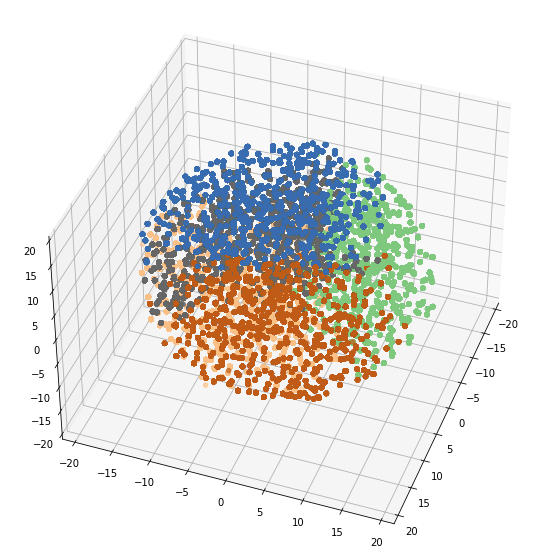

In [36]:
# Create Figure

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection ="3d")

#change view
ax.view_init(40, 20)
 
# Create Plot

ax.scatter3D(lda_df_tsne[0], lda_df_tsne[1], lda_df_tsne[2], c=topics, cmap = plt.cm.Accent)

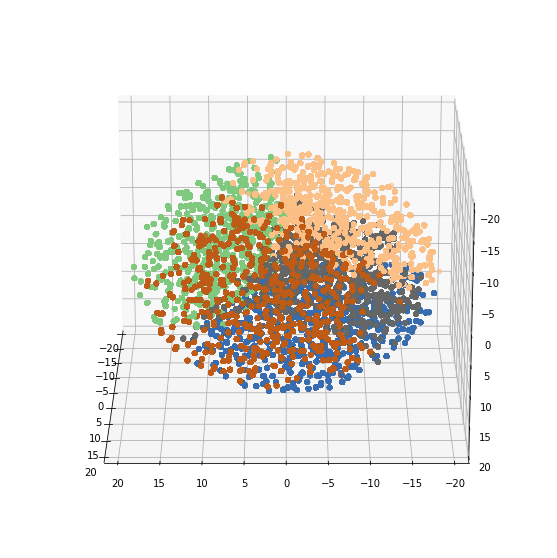

In [53]:
# Create Figure

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection ="3d")

#change view
ax.view_init(200, 180)
 
# Create Plot

ax.scatter3D(lda_df_tsne[0], lda_df_tsne[1], lda_df_tsne[2], c=topics, cmap = plt.cm.Accent)

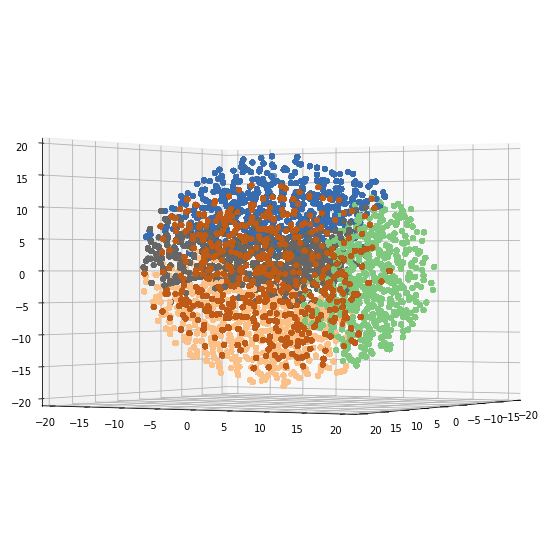

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:
# Create Figure

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection ="3d")
 
# Create Plot

ax.scatter3D(lda_df_tsne[0], lda_df_tsne[1], lda_df_tsne[2], c=topics, cmap = plt.cm.Accent)

# 360 Degree view
for angle in range(0, 360):
    ax.view_init(angle, 30)
    plt.draw()
    plt.pause(.001)

plt.show()

It's a little difficult to discern the gray cluster in relation to the other four, but we seem to be avoiding the kind of obvious errors that could be seen the 2D, untuned model.

In [73]:
df.head(20)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Sale_Total,cleaned_description,segment
0,536365.0,85123A,6.0,2.55,17850.0,United Kingdom,15.30,hanging heart tlight holder,0
1,536365.0,71053.0,6.0,3.39,17850.0,United Kingdom,20.34,metal lantern,0
2,536365.0,84406B,8.0,2.75,17850.0,United Kingdom,22.00,cream cupid heart coat hanger,0
3,536365.0,84029G,6.0,3.39,17850.0,United Kingdom,20.34,knitted union flag hot water bottle,3
4,536365.0,84029E,6.0,3.39,17850.0,United Kingdom,20.34,woolly hottie heart,4
5,536365.0,22752.0,2.0,7.65,17850.0,United Kingdom,15.30,babushka nesting box,1
6,536365.0,21730.0,6.0,4.25,17850.0,United Kingdom,25.50,glass star frosted tlight holder,0
7,536366.0,22633.0,6.0,1.85,17850.0,United Kingdom,11.10,hand warmer union jack,3
8,536367.0,84879.0,32.0,1.69,13047.0,United Kingdom,54.08,assorted colour bird ornament,2
9,536367.0,22745.0,6.0,2.10,13047.0,United Kingdom,12.60,poppy playhouse bedroom,1


In [72]:
df= df.drop(columns = 'topic')

In [74]:
#export tidy dataframe
df.to_csv('./segments_df.csv', index= False)

### Conclusion:

The clustering analyses I have attempted did not yield any obvious answers about how to segment the business. This is not that suprising given how short the descriptions are and how many items that could fall into multiple categories (e.g. does a Christmas card fall count as a holiday item? Stationary? Something else?). HDBSCAN offered the least insight, as the two outcomes it gave based on different parameters were either lumping almost everything into a single category, or creating hundreds of clusters. Modeling with Gensim suggested either 3 or 8 clusters based on coherence scores. However, when I examined the groups that came out of the gensim model, they seemed slightly more arbitrary than those produced by an LDA model.

Having set realistic expectations for my segments, the best option was a 5 cluster LDA model. Five segments was in the sweet spot in terms of finding various potential aspects of the business, while not breaking it into so many sections that it would be cumbersome to model and monitor all of them. While the nature of the data meant that grouping was inherently going to be blurry, after tuning the batch size and maximum iterations the groupings made some sense (though a little imagination and leeway is needed). I then used 3D graphing to verify that, insofar as the descriptions could be represented numerically, the model was clustering well. 

### Citations

A great deal of this work was adopted from a project by David Borelli. I have linked his write up and github below.

https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e
https://github.com/dborrelli/chat-intents